# An Analysis on Solar UV Radiations

This notebook performs exploratory data analysis (EDA) on a dataset containing information about UV Radiation from the Sun. Through various visualizations such as histograms, scatter plots, correlation heatmap, cluster plots and fitted line plot our goal is to uncover patterns, relationships, and distributions in the data. Non-numeric columns (like 'Altitude' and 'Ozone_Level ') are excluded where appropriate.

### Importing the Packages

In [255]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

### Loading the Data

In [256]:
uv = pd.read_csv('uv_data_with_target.csv', index_col=[0,2])
# Sort the DataFrame by the multi-level index (Month, Day, Hour)
uv_sorted = uv.sort_index()


In [257]:
# Display the sorted DataFrame
print(uv)

            Day  Solar_Radiation  Cloud_Cover  Ozone_Level  Altitude  \
Month Hour                                                             
7     16     16       759.764166     0.875883   364.894303  0.241742   
4     20      4       654.386905     0.539095   229.287251  0.441490   
11    7      11       269.222261     0.282472   366.585943  0.893932   
8     14     24       419.846112     0.425228   308.059306  0.269279   
5     13     23       805.412606     0.037571   368.933182  2.732479   
...         ...              ...          ...          ...       ...   
6     9      27       398.971930     0.752398   263.220262  2.156098   
5     1       8       724.256252     0.531294   211.148171  1.758706   
6     10     28       794.010534     0.677438   321.962552  1.477101   
      9      14       689.185618     0.428458   248.160763  0.576947   
7     20     25       236.435567     0.731496   277.361448  1.391809   

            UV_Index UV_Risk_Level  
Month Hour                

### Statistical Depth

In [258]:
descriptive_stats = uv.select_dtypes(include=['float64', 'int64']).describe()
descriptive_stats

,Day,Solar_Radiation,Cloud_Cover,Ozone_Level,Altitude,UV_Index
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,14.314000,547.958736,0.497176,297.613685,1.502595,1.572915
std,8.170689,260.145029,0.285633,57.635504,0.863333,1.321936
min,1.000000,100.121224,0.000012,200.006144,0.002830,0.001036
25%,7.000000,333.832762,0.249504,247.468695,0.772781,0.556376
50%,14.000000,545.803120,0.500236,296.652636,1.468251,1.222073
75%,22.000000,778.205276,0.738917,346.338115,2.225567,2.326334
max,28.000000,998.512760,0.999558,399.549878,2.998051,7.157764


### Distribution of Solar Radiation

Solar Radiation distribution reveals how UV radiation from the sun varies throughout the year. Solar radiation has a strong correlation with UV index. By observing the data we can see that the solar radiation has a frequency mixture in the high, middle and low levels.

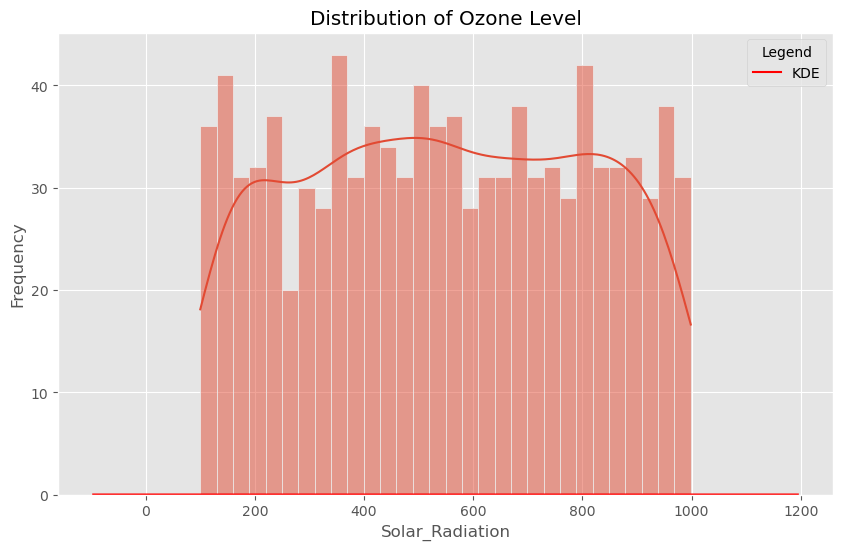

In [295]:
# Set up the plotting style
plt.style.use('ggplot')

# Temperature distribution
plt.figure(figsize=(10, 6))
sns.histplot(uv['Solar_Radiation'], kde=True, bins=30)
plt.title('Distribution of Ozone Level')
plt.xlabel('Solar_Radiation')
plt.ylabel('Frequency')
plt.legend(title='Legend')

plt.savefig("UVSolRadHist.jpg", dpi = 400)
plt.show()

In [289]:
uv_skew_kurt_check = uv[["Solar_Radiation"]].copy()
uv_skew_kurt_check.skew()

Solar_Radiation   -0.00788
dtype: float64

In [290]:
uv_skew_kurt_check.kurtosis()

Solar_Radiation   -1.175754
dtype: float64

### Scatter plot of Solar Radiation VS UV Index

This scatter plot shows the relationship between UV index and Solar Radiation, with colors representing different UV risk levels. By examining this relationship, we can understand how UV index influences solar radiation, a critical factor for assessing the risk levels of the UV with respects to its index.

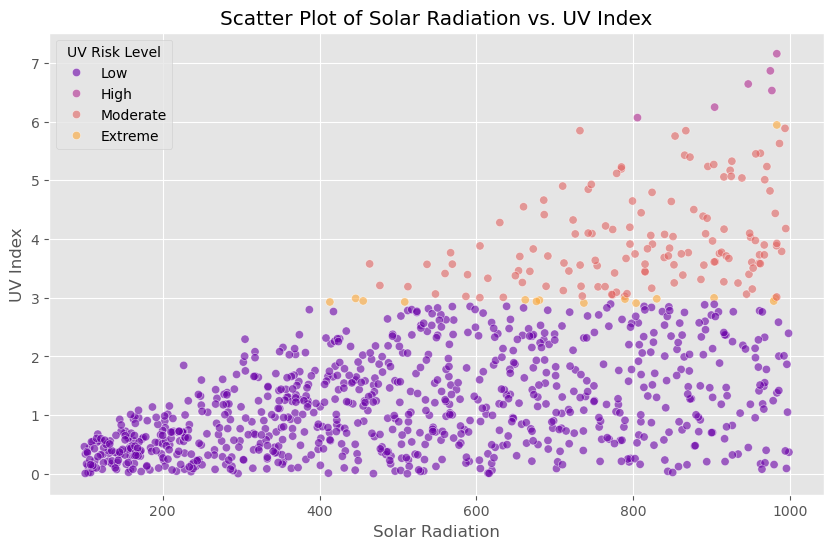

In [260]:
# Scatter plot for Temperature vs Luminosity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=uv, x='Solar_Radiation', y='UV_Index', hue='UV_Risk_Level', palette='plasma', alpha=0.6)
plt.title('Scatter Plot of Solar Radiation vs. UV Index')
plt.xlabel('Solar Radiation')
plt.ylabel('UV Index')
plt.legend(title='UV Risk Level')
plt.savefig("UVRisk_SR_Index_scatter")
plt.show()

### Correlation Heatmap

The correlation heatmap reveals relationships between numerical features, helping us identify pairs of variables that change together. Strong correlations, such as between Solar Radiation and UV Index, might suggest that as one variable increases, the other tends to follow.

In [261]:
# Correlation heatmap for numeric features
def plot_uv_heat(uv):
    '''
    plots a correlation of the numerical attributes of the star dataset
    '''
    plt.figure(figsize = (8, 6))
    sns.heatmap(data = uv, annot = True, cmap = 'inferno', square = True)
    plt.title('Correlation Heatmap of Numerical Features')
    plt.savefig("UV HeatMap.png", dpi = 600, bbox_inches="tight")
    plt.show()

In [262]:
numeric_data = uv.select_dtypes(include=['float64', 'int64'])

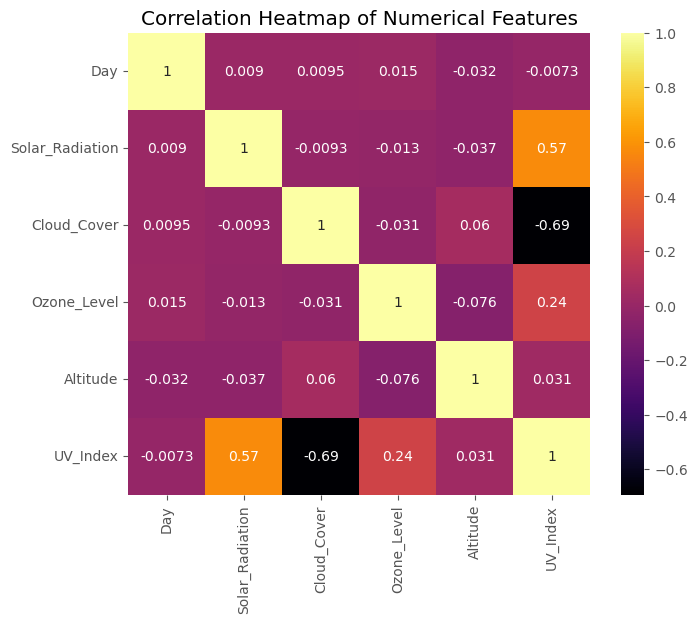

In [263]:
plot_uv_heat(numeric_data.corr())

### Elbow Method

In [264]:
# select the variables
x = uv["UV_Index"]
y = uv["Cloud_Cover"]

In [265]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

# Prepare the data for clustering
df_clust = uv[['UV_Index', 'Cloud_Cover']].copy()
scaler = MinMaxScaler()
norm = scaler.fit_transform(df_clust)
inv_norm = scaler.inverse_transform(norm)


# #Plot Silhouette Scores
# plt.figure(figsize=(10, 6))
# plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='g', label='Silhouette Score')
# plt.title('Silhouette Scores for Different Clusters')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.xticks(range(2, 11))
# plt.legend()
# plt.grid(True)
# plt.show()

In [266]:
def one_silhouette_inertia(n, xy):
    """ 
    Calculates the silhouette score and WCSS for n clusters 
    """
    # Set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n, n_init=20)  #, random_state=42
    # Fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_
    
    # Calculate the silhouette score
    score = silhouette_score(xy, labels)
    inertia = kmeans.inertia_

    return score, inertia

In [279]:
# Plot the Elbow Plot
def plot_elbow_method(min_k, max_k, wcss, best_n):
    """
    Plots the elbow method between min_k and max_k
    """

    fig, ax = plt.subplots(dpi = 144)
    ax.plot(range(min_k, max_k + 1), wcss, 'kx-')
    ax.scatter(best_n, wcss[best_n-min_k], marker = 'o', color = 'red', facecolors = 'none', s = 50)

    #formatting
    ax.set_xlabel('Number of Clusters')
    ax.set_xlim(min_k, max_k)
    ax.set_ylabel('WCSS')
    ax.title.set_text('Elbow Method for Clusters')
    plt.savefig("elbow.png", dpi = 600, bbox_inches="tight")
    plt.show()
    return

C:\Users\eddyl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


 2 clusters silhouette score = 0.54


C:\Users\eddyl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


 3 clusters silhouette score = 0.45


C:\Users\eddyl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


 4 clusters silhouette score = 0.42


C:\Users\eddyl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


 5 clusters silhouette score = 0.41


C:\Users\eddyl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


 6 clusters silhouette score = 0.43


C:\Users\eddyl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


 7 clusters silhouette score = 0.42


C:\Users\eddyl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


 8 clusters silhouette score = 0.41


C:\Users\eddyl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


 9 clusters silhouette score = 0.38


C:\Users\eddyl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


10 clusters silhouette score = 0.39
Best number of clusters =  2


<Figure size 640x480 with 0 Axes>

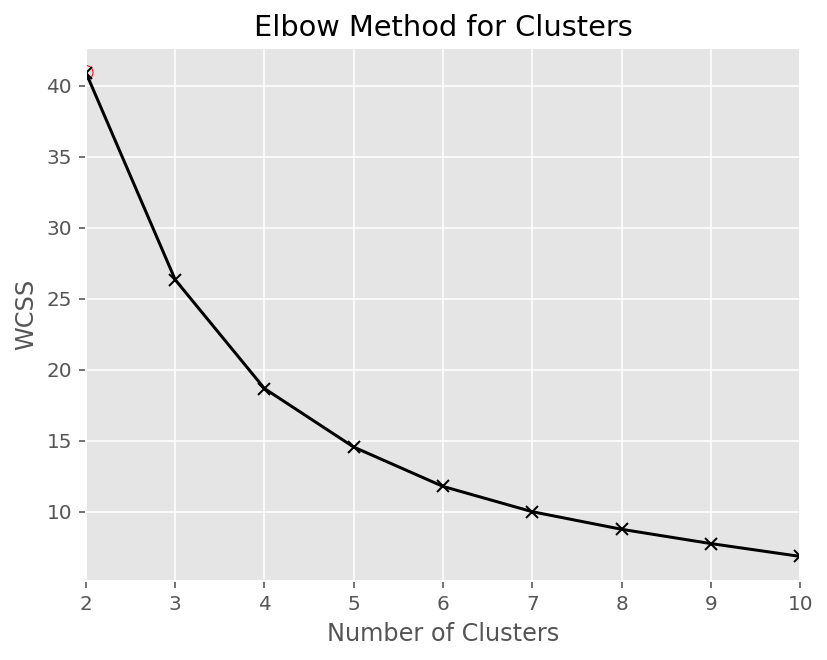

In [280]:
# Initialize variables to store WCSS and the best score
wcss = []
best_n, best_score = None, -np.inf
#silhouette_scores = []

# Loop through cluster sizes from 2 to 10
for n in range(2, 11):
    score, inertia = one_silhouette_inertia(n, norm)
    wcss.append(inertia)
    #silhouette_scores.append(score)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n:2g} clusters silhouette score = {score:.2f}")
print(f"Best number of clusters = {best_n:2g}")
plt.savefig("elbow1.png", dpi = 600, bbox_inches="tight")
plot_elbow_method(2, 10, wcss, best_n)

In [281]:
def plot_fitted_uv_radiation(labels, xy, xkmeans, ykmeans, centre_labels):
    """
    Plots clustered data as a scatter plot with determined centres shown
    """
    fig, ax = plt.subplots(dpi=144)
    s = ax.scatter(xy[:, 0], xy[:, 1], c=labels,cmap="plasma", marker='.',label='Data')
    ax.scatter(xkmeans, ykmeans, marker='d', color="purple",label='Estimated Centres')
    cbar = fig.colorbar(s)
    cbar.set_ticks(np.unique(labels))
    ax.legend()
    ax.set_xlabel('UV Index')
    ax.set_ylabel('Cloud Cover')
#   ax.set_xscale('log')
    plt.savefig("fitted.png", dpi = 600, bbox_inches="tight")
    plt.show()
    return

C:\Users\eddyl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


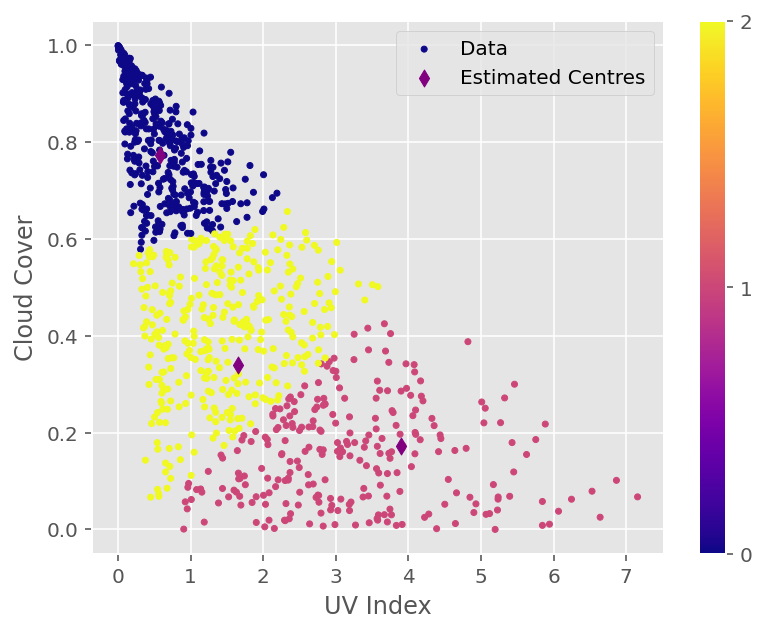

In [275]:
inv_norm = scaler.inverse_transform(norm)
for k in range(3, 4):
    kmeans = KMeans(n_clusters=k, n_init=20)
    kmeans.fit(norm) # fit done on x,y pairs
    labels = kmeans.labels_
    # the estimated cluster centres
    cen = scaler.inverse_transform(kmeans.cluster_centers_)
    # xkmeans = cen[:, 0]
    # ykmeans = cen[:, 1]
    cenlabels = kmeans.predict(kmeans.cluster_centers_)
    plot_fitted_uv_radiation(labels, inv_norm, xkmeans, ykmeans, cenlabels)

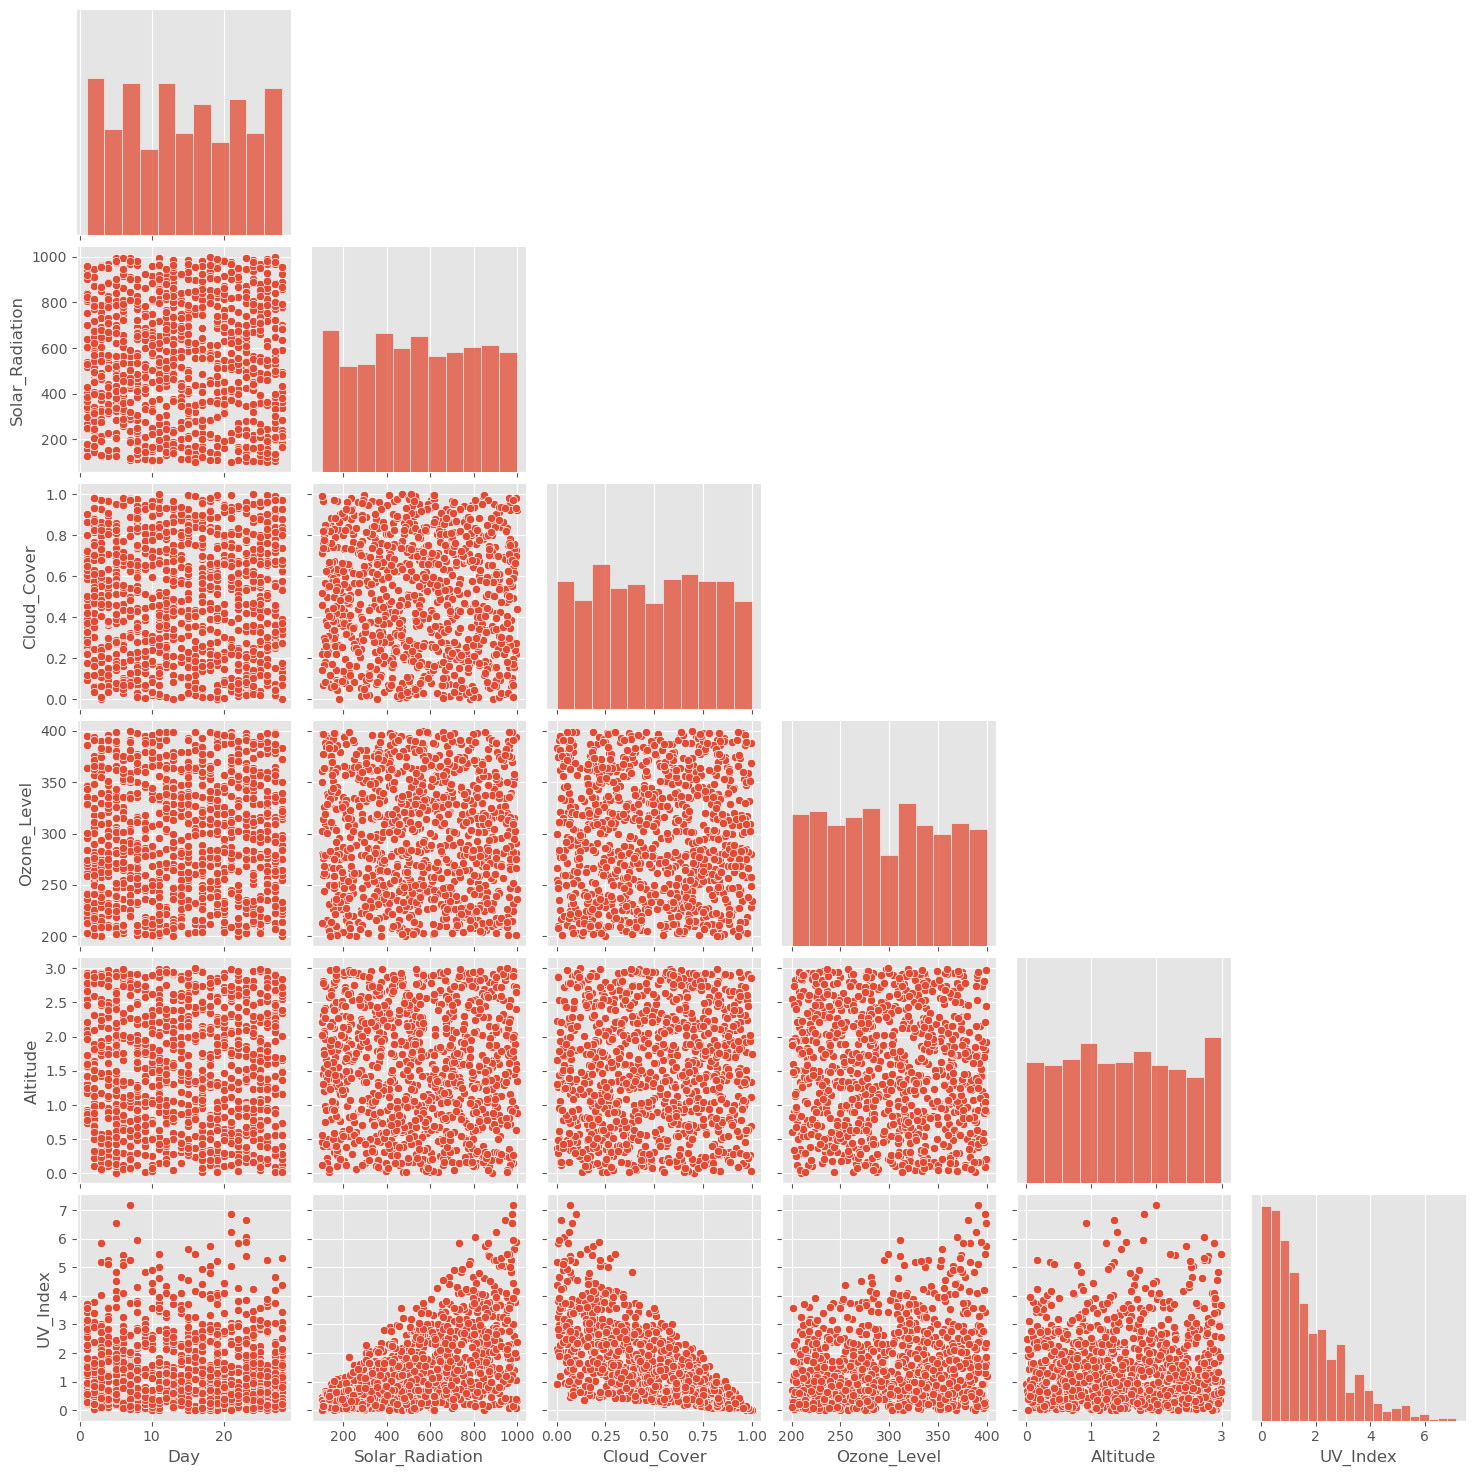

In [276]:
sns.pairplot(uv, corner=True)
plt.show()

In [272]:
from scipy.optimize import curve_fit
from numpy.polynomial import Polynomial as Poly

In [273]:
print(uv)

            Day  Solar_Radiation  Cloud_Cover  Ozone_Level  Altitude  \
Month Hour                                                             
7     16     16       759.764166     0.875883   364.894303  0.241742   
4     20      4       654.386905     0.539095   229.287251  0.441490   
11    7      11       269.222261     0.282472   366.585943  0.893932   
8     14     24       419.846112     0.425228   308.059306  0.269279   
5     13     23       805.412606     0.037571   368.933182  2.732479   
...         ...              ...          ...          ...       ...   
6     9      27       398.971930     0.752398   263.220262  2.156098   
5     1       8       724.256252     0.531294   211.148171  1.758706   
6     10     28       794.010534     0.677438   321.962552  1.477101   
      9      14       689.185618     0.428458   248.160763  0.576947   
7     20     25       236.435567     0.731496   277.361448  1.391809   

            UV_Index UV_Risk_Level  
Month Hour                

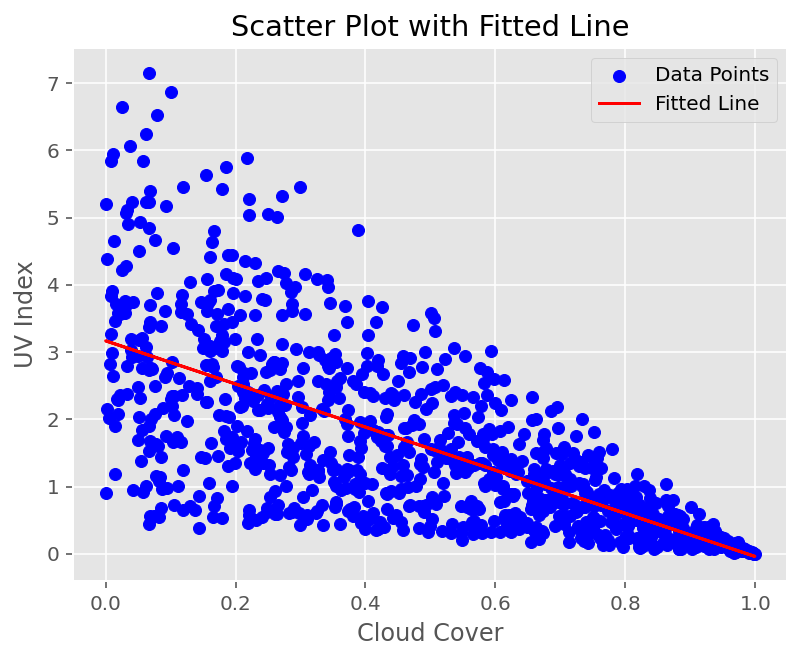

In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def plot_uv_scatter_with_line(x, y):
    """
    Creates a scatter plot of x and y data with an overplotted line.
    """
    # Perform linear regression to fit a line
    coefficients = np.polyfit(x, y, 1)  # Linear fit
    yline = np.polyval(coefficients, x)

    # Generate the scatter plot and fitted line
    plt.figure(dpi=144)
    plt.scatter(x, y, label='Data Points', color='blue')  # Scatter plot
    plt.plot(x, yline, label='Fitted Line', color='red')  # Line plot

    # Formatting the plot
    plt.xlabel('Cloud Cover')
    plt.ylabel('UV Index')
    plt.title('Scatter Plot with Fitted Line')
    plt.legend()
    plt.savefig("scatter_with_line.png", dpi = 600, bbox_inches="tight")
    plt.show()

# Extract the data from the Excel file
x = uv["Cloud_Cover"]
y = uv["UV_Index"]

# Call the function to create the plot
plot_uv_scatter_with_line(x, y)
